In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Install opencv 
```
conda install opencv
```

or 
```
pip install opencv-python
```

In [2]:
!curl "https://reviewonline.co.za/wp-content/uploads/sites/68/2018/12/giraffes1.jpg" -o /tmp/img.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   869k      0 --:--:-- --:--:-- --:--:--  864k


In [3]:
img = cv2.imread("/tmp/img.jpg")

In [4]:
img.shape

(514, 983, 3)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

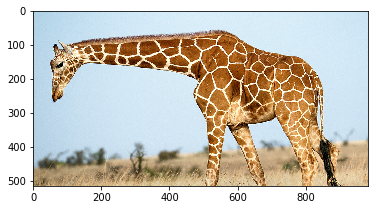

In [6]:
plt.imshow(img)

# RGB layers

In [7]:
img.shape

(514, 983, 3)

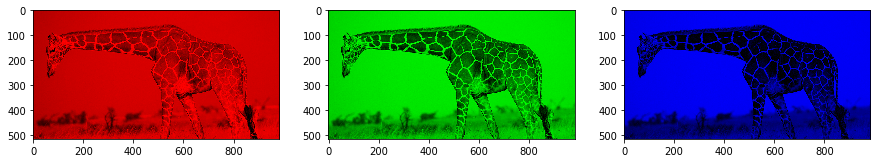

In [8]:
fig, axes = plt.subplots(1, 3, figsize = (15,3))


img1 = img.copy()
img1[:,:,1]=0
img1[:,:,2]=0
axes[0].imshow(img1)

img1 = img.copy()
img1[:,:,0]=0
img1[:,:,2]=0
axes[1].imshow(img1)

img1 = img.copy()
img1[:,:,1]=0
img1[:,:,0]=0
axes[2].imshow(img1)

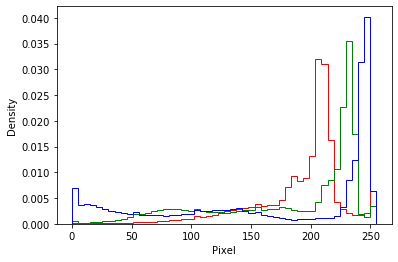

In [9]:
plt.hist(img[:,:,0].flatten(), bins = 50, histtype = "step", color = "red", density=True)
plt.hist(img[:,:,1].flatten(), bins = 50, histtype = "step", color = "green", density=True)
plt.hist(img[:,:,2].flatten(), bins = 50, histtype = "step", color = "blue", density=True)
plt.xlabel("Pixel")
plt.ylabel("Density");

# RGB to Gray

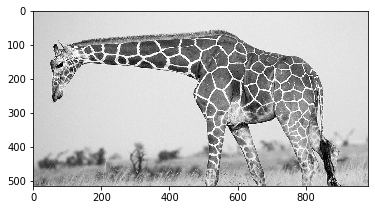

In [10]:
img5 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img5, cmap="gray")

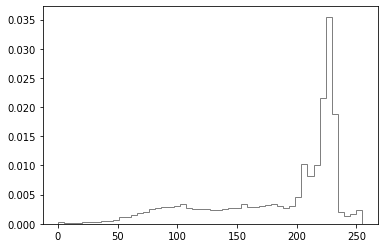

In [11]:
plt.hist(img5.flatten(), bins = 50, histtype = "step", color = "gray", density=True);

In [12]:
height, width = img.shape[:2]
height, width

(514, 983)

# Resize

(1028, 1966, 3)


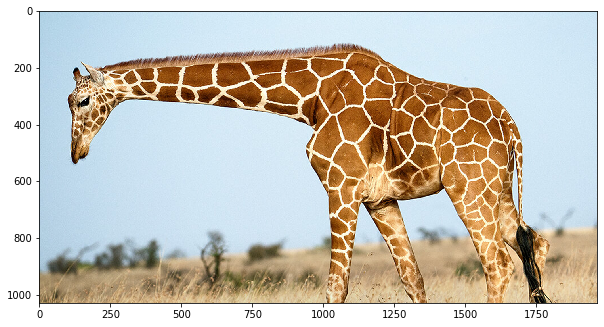

In [13]:
img2 = cv2.resize(img,(width * 2, height * 2), interpolation = cv2.INTER_CUBIC)
print(img2.shape)

plt.figure(figsize = (10, 8))
plt.imshow(img2)

(257, 491, 3)


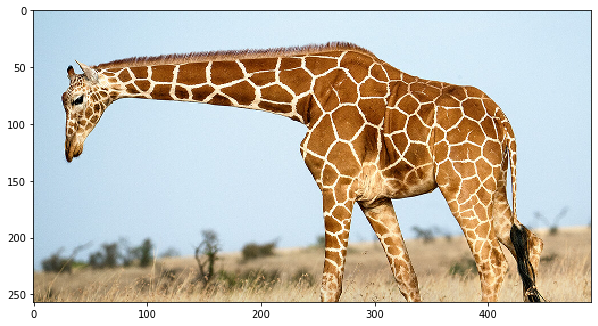

In [14]:
img2 = cv2.resize(img,(int(width/2), int(height/2)), interpolation = cv2.INTER_CUBIC)
print(img2.shape)

plt.figure(figsize = (10, 8))
plt.imshow(img2)

# Blur




#### Gaussian Blur

https://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html

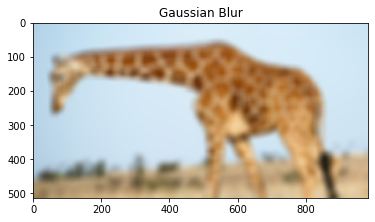

In [63]:
img3 = cv2.GaussianBlur(img, ksize=(31, 31), sigmaX = 10.0, sigmaY = 10.0)
plt.imshow(img3)
plt.title("Gaussian Blur");

#### Average Blur

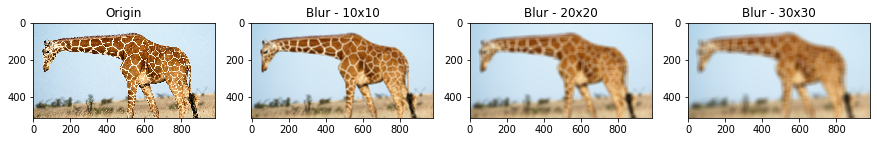

In [44]:
fig, axes = plt.subplots(1, 4, figsize = (15,3))

axes[0].imshow(img)
axes[0].set_title("Origin")
axes[1].imshow(cv2.blur(img, (10, 10)))
axes[1].set_title("Blur - 10x10")
axes[2].imshow(cv2.blur(img, (20, 20)))
axes[2].set_title("Blur - 20x20")
axes[3].imshow(cv2.blur(img, (30, 30)))
axes[3].set_title("Blur - 30x30");

# Crop

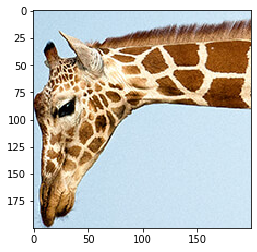

In [62]:
plt.imshow(img[70:270,50:250,:])

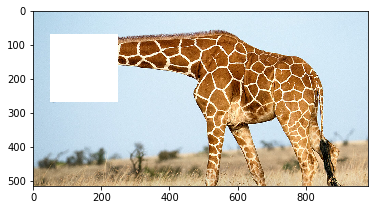

In [61]:
img3 = img.copy()
img3[70:270,50:250,:] = 255
plt.imshow(img3)

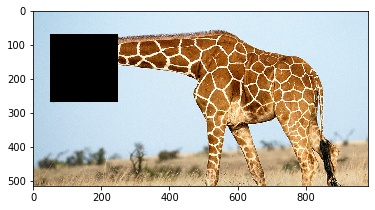

In [60]:
img3 = img.copy()
img3[70:270,50:250,:] = 0
plt.imshow(img3)

Text(0.5, 1.0, 'Masked with blurred rectangle')

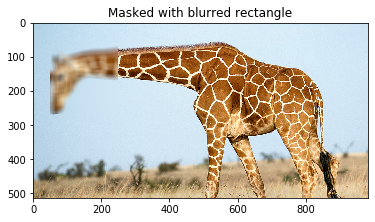

In [58]:
img3 = img.copy()
img3[70:270,50:250,:] = cv2.blur(img3[70:270,50:250,:], ksize=(20,20))
plt.imshow(img3)
plt.title("Masked with blurred rectangle")

Text(0.5, 1.0, 'Masked with transparent white rectangle')

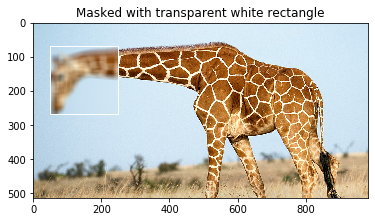

In [59]:
img3 = img.copy()
img3[70:270,50:250,:] = cv2.blur(img3[70:270,50:250,:], ksize=(20,20))
cv2.rectangle(img3, (50, 70), (250, 270), (255, 255, 255), 2)
plt.imshow(img3)
plt.title("Masked with transparent white rectangle")

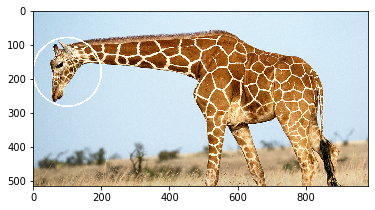

In [23]:
img3 = img.copy()
cv2.circle(img3, (100, 180), 100, (255, 255, 255), 3)
plt.imshow(img3)
plt.title("Masked with transparent white circle")

# Masking

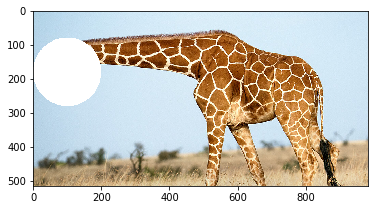

In [24]:
img1 = img.copy()
cv2.circle(img1, (100, 180), radius = 100, color = (255, 255, 255), thickness = -1)
plt.imshow(img1)
plt.title("Masked with white circle")

Text(0.5, 1.0, 'Masked with white rectangle')

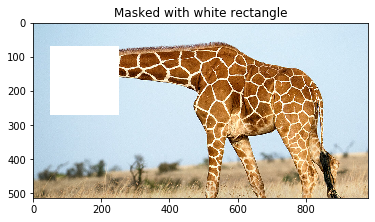

In [56]:
img1 = img.copy()
cv2.rectangle(img1, pt1 = (50, 70), pt2 = (250, 270), color = (255, 255, 255), thickness = -1)
plt.imshow(img1)
plt.title("Masked with white rectangle")

Text(0.5, 1.0, 'Bitwise masked')

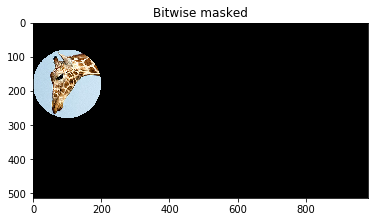

In [55]:
mask = cv2.circle(np.zeros_like(img), (100, 180), radius = 100, color = (255, 255, 255), thickness = -1)
img3 = cv2.bitwise_and(img, mask)
plt.imshow(img3)
plt.title("Bitwise masked")

# Shift

Text(0.5, 1.0, 'Shifted')

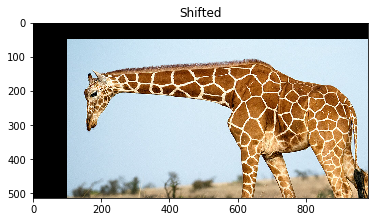

In [53]:
M = np.float32([[1,0,100],[0,1,50]])
img4 = cv2.warpAffine(img, M, (width,height))
plt.imshow(img4)
plt.title("Shifted")

# Flip

Text(0.5, 1.0, 'Flipped Horizontally and Vertically')

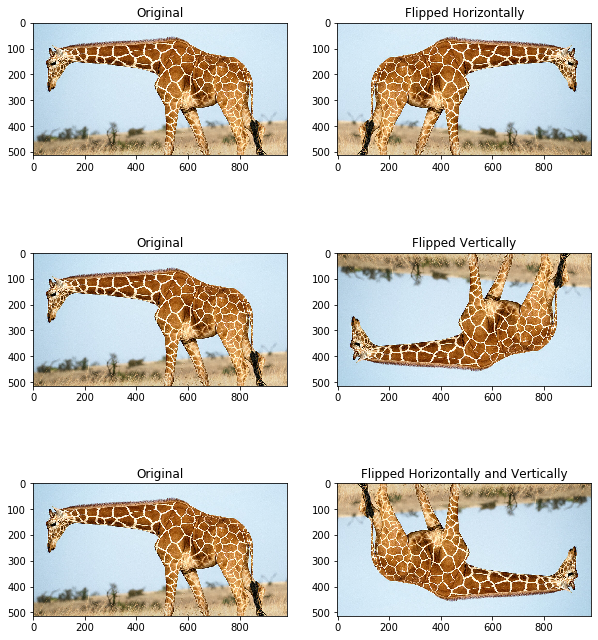

In [28]:
fig, axes = plt.subplots(3, 2, figsize = (10,12))

axes[0][0].imshow(img)
axes[0][1].imshow(cv2.flip(img, flipCode = 1))
axes[0][0].set_title("Original")
axes[0][1].set_title("Flipped Horizontally")

axes[1][0].imshow(img)
axes[1][1].imshow(cv2.flip(img, flipCode = 0))
axes[1][0].set_title("Original")
axes[1][1].set_title("Flipped Vertically")

axes[2][0].imshow(img)
axes[2][1].imshow(cv2.flip(img, flipCode = -1))
axes[2][0].set_title("Original")
axes[2][1].set_title("Flipped Horizontally and Vertically")

# Rotate

Text(0.5, 1.0, 'Rotate 10 degree')

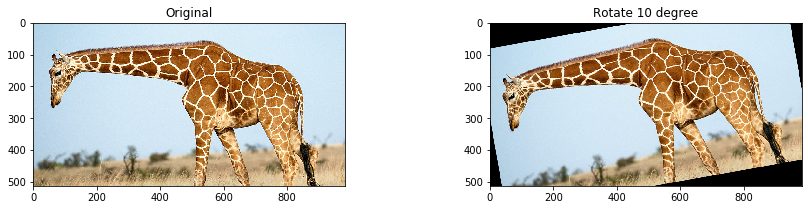

In [51]:
w, h = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D(center = (h//2, w//2), angle = 10, scale = 1.0)
fig, axes = plt.subplots(1, 2, figsize = (15,3))
axes[0].imshow(img)
axes[0].set_title("Original")
axes[1].imshow(cv2.warpAffine(img, rotation_matrix, (h, w)))
axes[1].set_title("Rotate 10 degree")

Text(0.5, 1.0, 'Rotated +180')

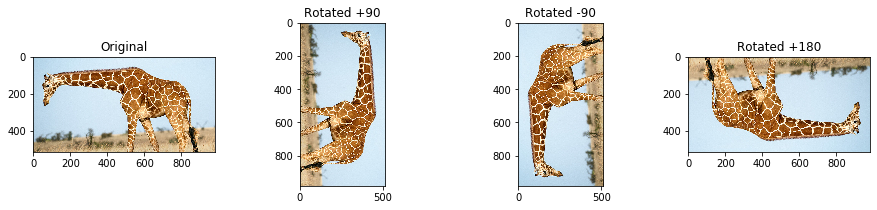

In [52]:
fig, axes = plt.subplots(1, 4, figsize = (15,3))

img1 = img.copy()
axes[0].imshow(img)
axes[0].set_title("Original")
axes[1].imshow(cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE))
axes[1].set_title("Rotated +90")
axes[2].imshow(cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE))
axes[2].set_title("Rotated -90")
axes[3].imshow(cv2.rotate(img1, cv2.ROTATE_180))
axes[3].set_title("Rotated +180")